In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import linear_model
import matplotlib.colors

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

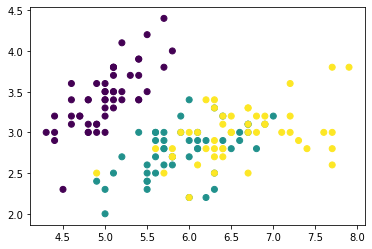

In [6]:
fig, ax = plt.subplots()
ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)

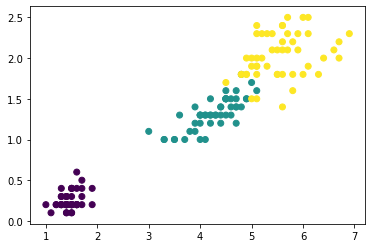

In [7]:
fig, ax = plt.subplots()
ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

In [8]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

#Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [9]:
n_neighbors = 15
weights = 'uniform'

In [10]:
def plot_boundaries(X, estimator, h=0.02, ax=None, cmap=None):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    if ax is None:
        fig, ax = plt.subplots()
        
    if cmap is None:
        color_names = np.array(list(matplotlib.colors.CSS4_COLORS.keys()))
        keep = np.random.randint(0, len(color_names), size=len(k_neighb.classes_))
        cmap = ListedColormap(color_names[keep])
    ax.pcolormesh(xx, yy, Z, cmap=cmap)

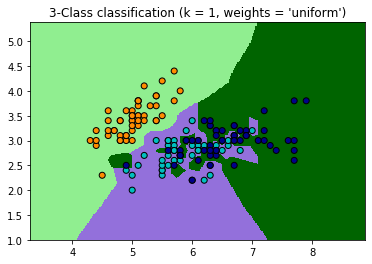

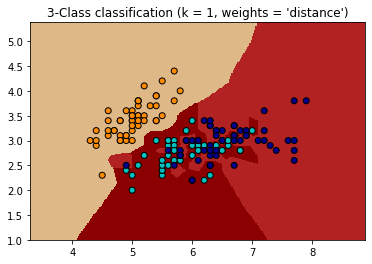

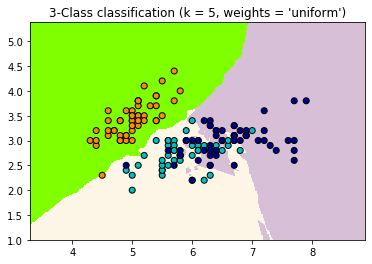

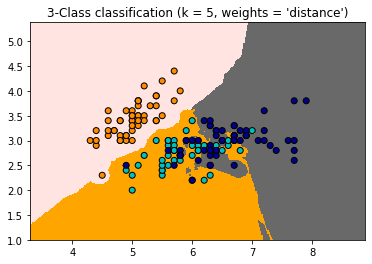

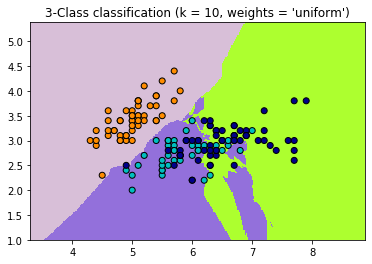

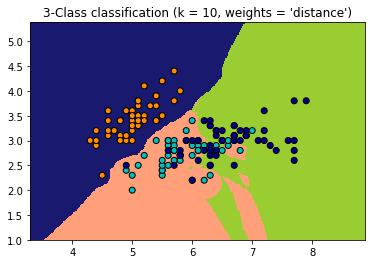

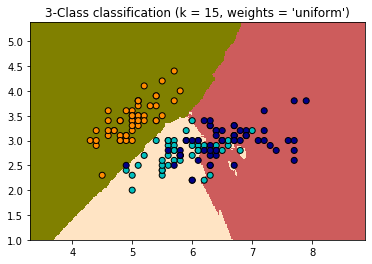

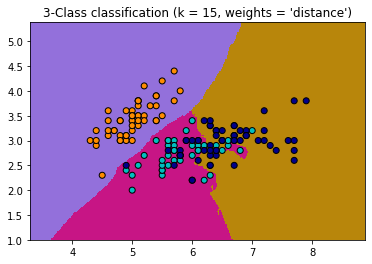

In [11]:
for n_neighbors in [1, 5, 10, 15]:
    for weights in ['uniform', 'distance']:
        k_neighb = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        k_neighb.fit(X, y)
        fig, ax = plt.subplots()
        plot_boundaries(X, k_neighb, ax=ax)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
        ax.set_title("3-Class classification (k = %i, weights = '%s')"
                      % (n_neighbors, weights))

In [12]:
from sklearn import svm

In [13]:
def cross_validate(X, y, estimator, n_folds=10):
    indices = np.random.permutation(len(X))

    folds = np.split(indices, n_folds)
    scores = np.zeros(n_folds)

    for f, fold in enumerate(folds):
        test_indices = fold
        train_indices = np.delete(folds, f)
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        estimator.fit(X_train, y_train)
        prediction = estimator.predict(X_test)
        scores[f] = np.sum(prediction == y_test) / len(y_test)
        
    return scores

In [14]:
svc = svm.SVC(kernel='linear')
k_neighb = neighbors.KNeighborsClassifier(15, weights='uniform')
log = linear_model.LogisticRegression(C=1e5)

In [15]:
svc_scores = cross_validate(X, y, svc)
knn_scores = cross_validate(X, y, k_neighb)
log_scores = cross_validate(X, y, log)

In [16]:
results = [svc_scores, knn_scores, log_scores]
labels = ["SVM", "kNN", "log"]

[Text(0, 0, 'SVM'), Text(0, 0, 'kNN'), Text(0, 0, 'log')]

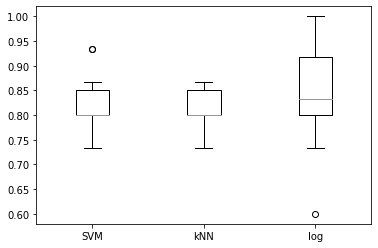

In [17]:
fig, ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(labels)